In [1]:
import baltic as bt
import requests
from io import StringIO as sio
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Polygon, PathPatch
from matplotlib.path import Path
from matplotlib.collections import LineCollection
from matplotlib import cm
import matplotlib.patheffects as path_effects
import numpy as np
from datetime import datetime as dt
import os
import PyAstronomy
from PyAstronomy import pyasl
import datetime
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.patheffects as path_effects
from matplotlib.gridspec import GridSpec
from matplotlib.patches import Polygon
import matplotlib as mpl
from matplotlib.ticker import MultipleLocator
mpl.rcParams['font.family'] = 'sans-serif'
from scipy import stats
import pandas as pd

def get_all_terminals(node):
    terminals = []
    for i in node.children:
        if i.branchType == "leaf":
            terminals.append(i)
        if i.branchType != "leaf":
            terminals.extend(get_all_terminals(i))
    return terminals

treeFile="/Volumes/Ifeanyi/CladeII_ML/DTA+SLE.mcc.tree" ## stream from repo copy

ll=bt.loadNewick(treeFile) ## treeFile here can alternatively be a path to a local file
ll.traverse_tree()
ll.treeStats()
ll.sortBranches()


Tree height: 5.740384
Tree length: 75.101942
strictly bifurcating tree

Numbers of objects in tree: 499 (249 nodes and 250 leaves)




Tree height: 1.307111
Tree length: 65.214507
strictly bifurcating tree

Numbers of objects in tree: 497 (248 nodes and 249 leaves)



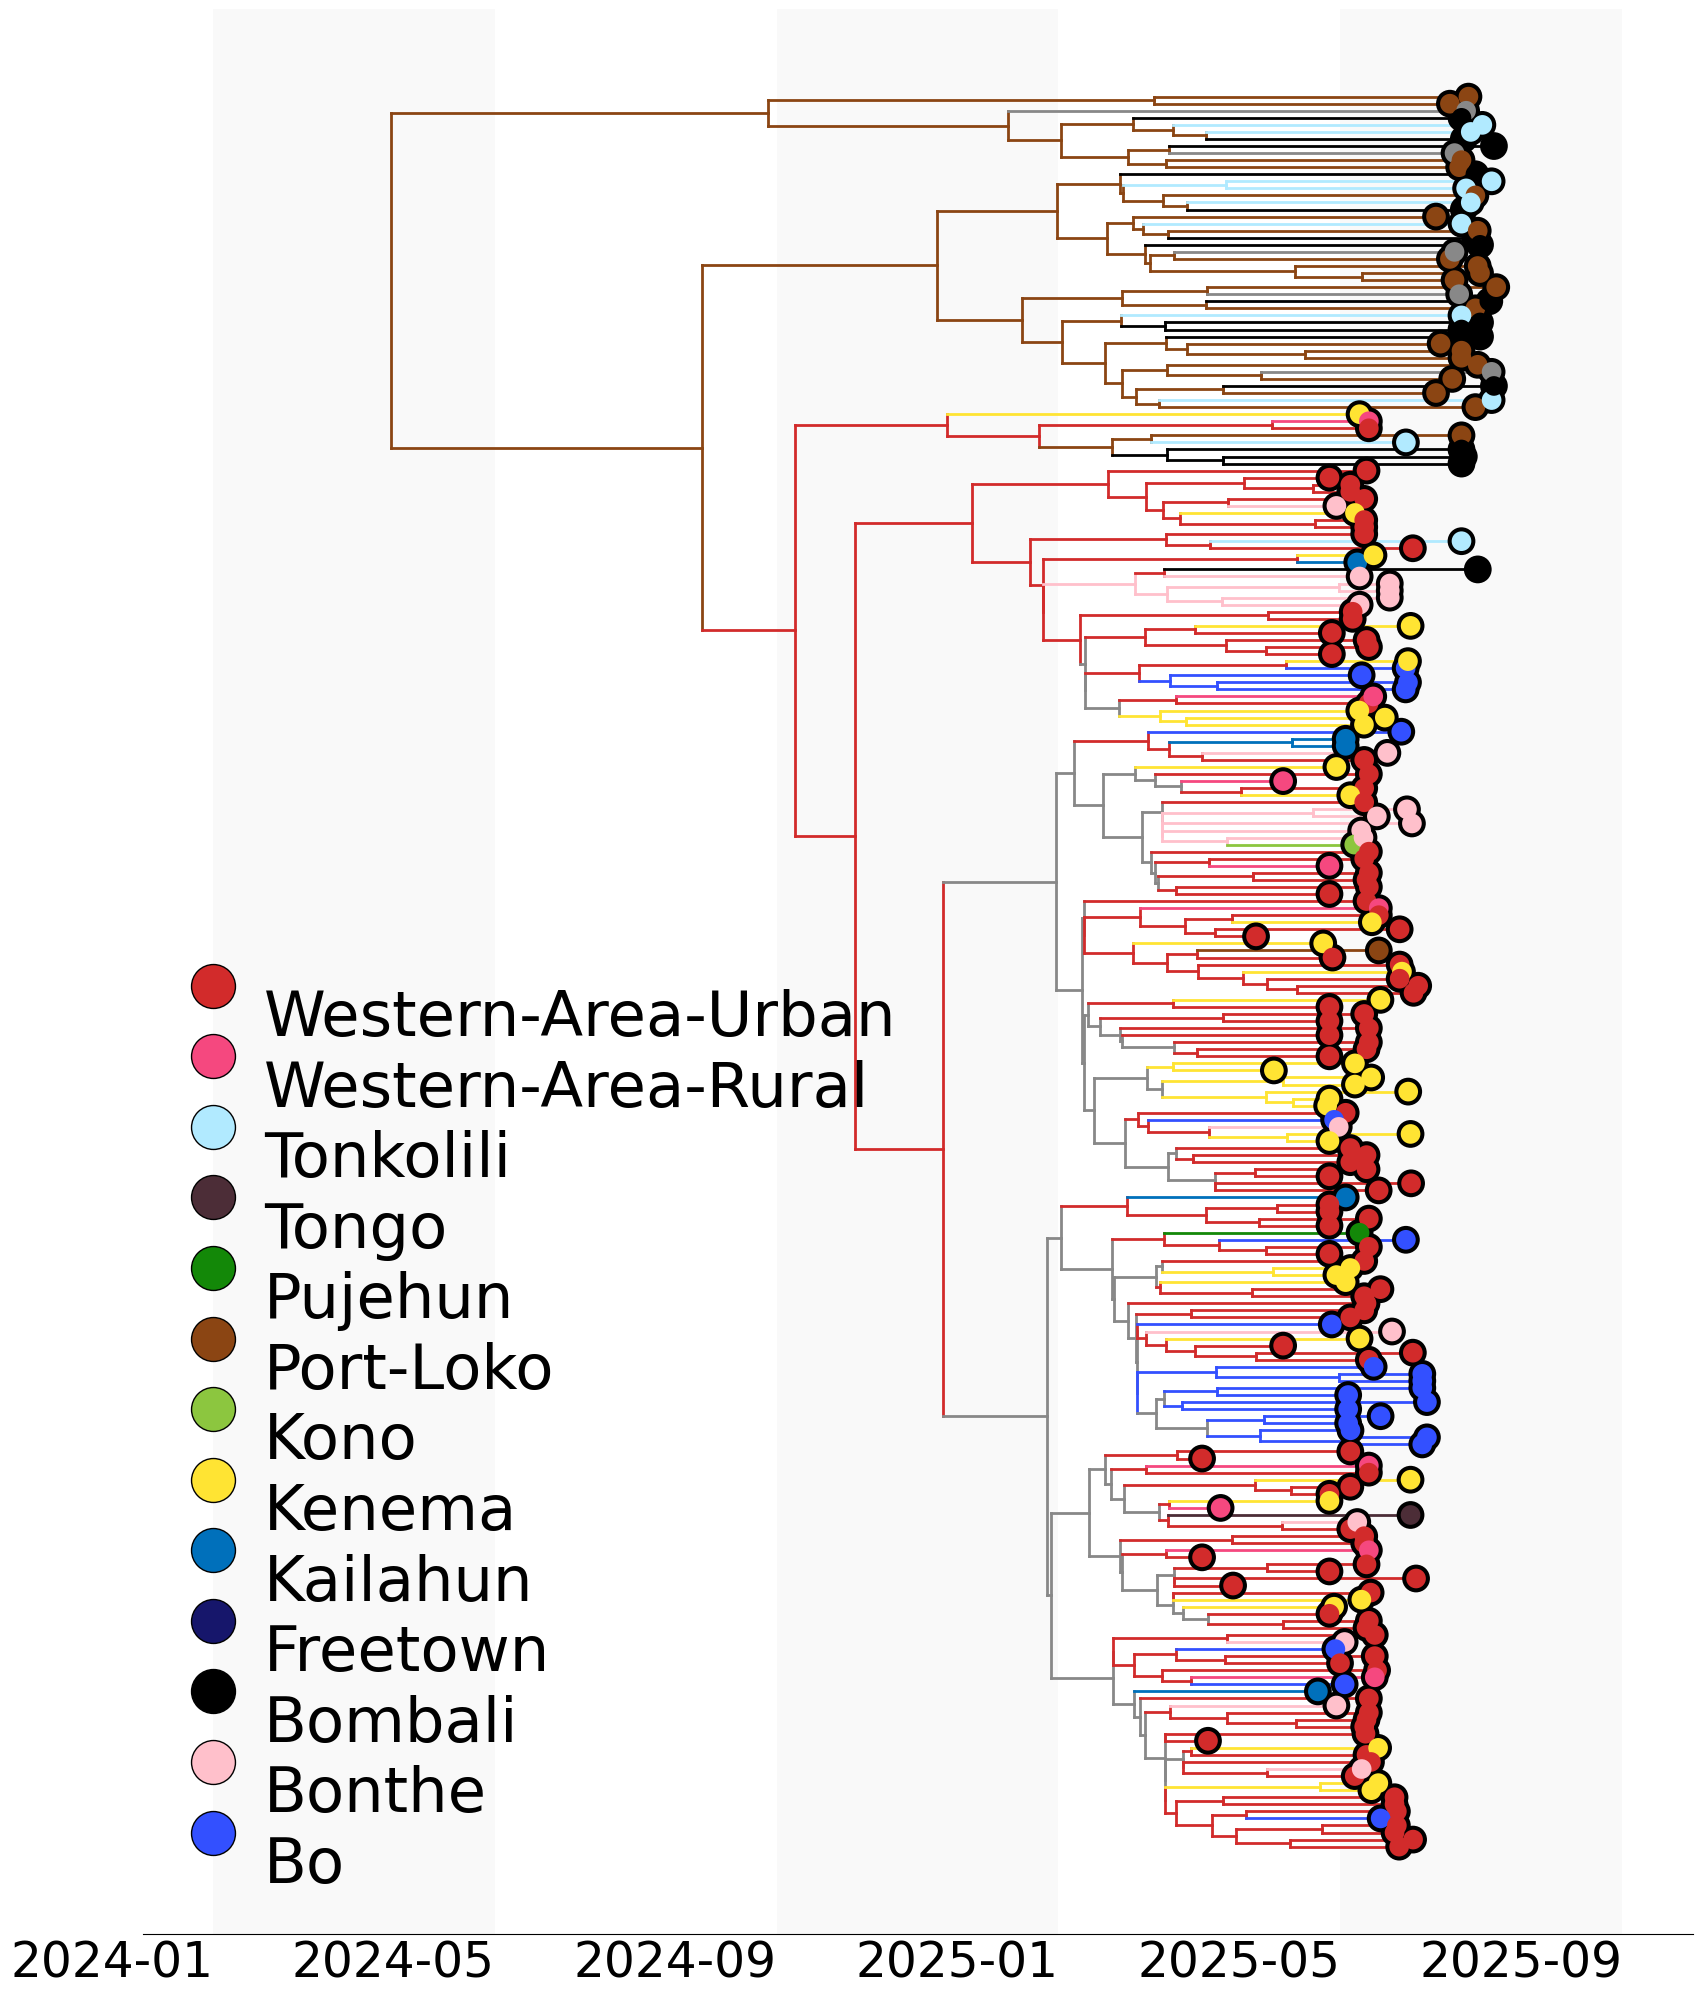

In [3]:
import baltic as bt
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import numpy as np
import datetime as dt
import matplotlib as mpl

mpl.rcParams['font.family'] = 'sans-serif'

# ——————————————————————————————————————————————
# load and prepare
treeFile = "/Volumes/Ifeanyi/CladeII_ML/DTA+SLE.mcc.pruned.tree"
ll = bt.loadNexus(treeFile)
ll.traverse_tree()
ll.treeStats()
ll.sortBranches()

# your colour map
dd = {
    "Bo": "#3350FF", "Bonthe": "#FFC0CB", "Bombali": "black",
    "Freetown": "#16166B", "Kailahun": "#0070BB", "Kenema": "#FFE433",
    "Kono": "#8cc63f", "Port-Loko": "#8B4513", "Pujehun": "#138808",
    "Tongo": "#4c2d37", "Tonkolili": "#b1eaff",
    "Western-Area-Rural": "#f5487f", "Western-Area-Urban": "#D22B2B"
}

# ----------------------------------------------------------------
# Colour‐mapping: use every node's 'location' trait
def c_func(node):
    loc = node.traits.get("location")
    return dd.get(loc, "#888888")   # fallback grey only if undefined in dd
# ----------------------------------------------------------------

# plot setup
fig, ax1 = plt.subplots(figsize=(20, 25))

effects = [
    path_effects.Stroke(linewidth=2, foreground='white'),
    path_effects.Stroke(linewidth=0.7, foreground='black')
]
leaf_target = lambda k: k.branchType == 'leaf'

# plot branches and points

ll.plotTree(
    ax1,
    x_attr=lambda k: k.absoluteTime,
    colour=c_func
)

ll.plotPoints(ax1,
    x_attr=lambda k: k.absoluteTime,
    size=200,
    colour=c_func,
    zorder=100
)



# tip labels
#for node in ll.Objects:
 #   if node.branchType == 'leaf':
  #      ax1.text(node.absoluteTime, node.y, node.x,
   #              ha='left', va='center', size=8,
    #             color=c_func(node),
     #            path_effects=effects)

# ——————————————————————————————————————————————
# build 2‑month ticks from min→max time
times      = [n.absoluteTime for n in ll.Objects]
start_year = int(np.floor(min(times)))
end_year   = int(np.ceil(max(times)))

start = dt.datetime(start_year, 1, 1)
end   = dt.datetime(end_year,   1, 1)

# generate every 2nd month
dates = []
yr, mo = start.year, start.month
while True:
    dates.append(dt.datetime(yr, mo, 1))
    mo += 4
    if mo > 12:
        yr += mo // 12
        mo = mo % 12
    if dt.datetime(yr, mo, 1) > end:
        break

# ——————————————————————————————————————————————
# add translucent background bands for each 2‑month interval
for idx in range(len(dates)-1):
    # shade every other interval, or all if you prefer
    if idx % 2 == 0:
        d0, d1 = dates[idx], dates[idx+1]
        x0 = d0.year + (d0.month-1)/12.0
        x1 = d1.year + (d1.month-1)/12.0
        ax1.axvspan(x0, x1,
                    facecolor='#F5F5F5',
                    alpha=0.6,
                    zorder=0,
                    edgecolor='none')

# convert to decimal years & labels
tick_pos   = [d.year + (d.month-1)/12.0 for d in dates]
tick_label = [d.strftime('%Y-%m')               for d in dates]

# apply to axis
ax1.set_xticks(tick_pos)
ax1.set_xticklabels(tick_label, rotation=0, ha='right', size=35)

# clean up
ax1.set_yticks([])
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.tick_params(axis='x', length=0)

# legend swatches
uu, yy = start_year, min(n.y for n in ll.Objects) + 2
for loc, colour in dd.items():
    ax1.scatter(uu, yy, s=1000, color=colour, zorder=400, edgecolor='black')
    ax1.text(uu + 0.06, yy - 7, loc, size=45)
    yy += 10

# save!
plt.savefig("/Volumes/Ifeanyi/CladeII_ML/DTA_MCC_state.png",
            bbox_inches='tight', dpi=300)
plt.savefig("/Volumes/Ifeanyi/CladeII_ML/DTA_MCC_state.svg",
            bbox_inches='tight', dpi=300)